In [1]:
#connecting to the google drive
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np

#Import & reading data and libraries

In [3]:
# Reading the meta data
# importing libraries

import gzip
import shutil

#Path to the meta data zip file. 'sentiment_analysis' is the folder name under 'My Drive'
path1 = '/content/gdrive/MyDrive/web & social media/meta_Cell_Phones_and_Accessories.json.gz'

# Path to meta data .json file
path2 = '/content/gdrive/MyDrive/web & social media/meta_Cell_Phones_and_Accessories.json'

# Unzipping the meta data file
with gzip.open(path1, 'rb') as f_in:
    with open(path2, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [4]:
# Reading the unzipped meta data into a Python list. The result will be a list of dictionaries. 
import json

# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open(path2, 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [5]:
# Getting the number of entries in the phonemetadata list
len(phonemetadata)

590071

In [6]:
#converting the list phonemetadata into a data frame
df_meta=pd.DataFrame(phonemetadata)

In [7]:
df_meta.head(5)

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,"[Cell Phones & Accessories, Accessories, Scree...",,[],,Trollies Sing a Long Party VHS,[],[],,,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,,,,6303195164
1,"[Cell Phones & Accessories, Accessories, Car A...",,[],,La Pura VHS,[],[],,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,,,,630524412X
2,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[New items to give you a new good mood, welcom...",,Leopard Thanksgiving Easter PC Black Case for ...,[],[],,,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,,,,6310200240
3,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,Puppies Faceplate Hard Case Protector for Net1...,[],[],,Live2Pedal,[Protect your phone with style through this At...,"[>#6,368,825 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501710
4,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,White Wolf Faceplate Protector Hard Case for S...,[],[],,wirelessoutletusa,[Protect your phone with style through this At...,"[>#2,672,454 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501273


In [8]:
def func(x):
  try:
    if 'Cell Phone' in x[1]:
      return True
    else:
      return False
  except:
    return False

In [9]:
#mapping the category column and getting phone data
df_meta['Cell Phone'] = df_meta['category'].map(lambda x: func(x))
df_meta

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,Cell Phone
0,"[Cell Phones & Accessories, Accessories, Scree...",,[],,Trollies Sing a Long Party VHS,[],[],,,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,,,,6303195164,False
1,"[Cell Phones & Accessories, Accessories, Car A...",,[],,La Pura VHS,[],[],,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,,,,630524412X,False
2,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[New items to give you a new good mood, welcom...",,Leopard Thanksgiving Easter PC Black Case for ...,[],[],,,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,,,,6310200240,False
3,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,Puppies Faceplate Hard Case Protector for Net1...,[],[],,Live2Pedal,[Protect your phone with style through this At...,"[>#6,368,825 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501710,False
4,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,White Wolf Faceplate Protector Hard Case for S...,[],[],,wirelessoutletusa,[Protect your phone with style through this At...,"[>#2,672,454 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501273,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590066,"[Cell Phones & Accessories, Accessories, Repla...",,[Compatible with:Motorola Moto G3 XT1552 G(201...,,Full LCD Touch Screen Digitizer Assembly Repla...,[],[https://images-na.ssl-images-amazon.com/image...,,hongkongruly,[Compatible with:Motorola Moto G3 XT1552 G(201...,"[>#1,179,531 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B01HJH76J4,False
590067,"[Cell Phones & Accessories, Cases, Holsters & ...",,[],,Universal Sports Armband Casehigh Shop Easy Fi...,[B01MDPWI5V],[https://images-na.ssl-images-amazon.com/image...,,CaseHQ,"[Universal Designed: Up to 5.7"" diagonal size....","663,487 in Cell Phones & Accessories (",[],{'ASIN: ': 'B01HJGI3VK'},Cell Phones & Accessories,,,$0.01,B01HJGI3VK,False
590068,"[Cell Phones & Accessories, Cases, Holsters & ...",,[<b>Brand Aim of LoHi:</b> <br /> LoHi is dedi...,,"iPhone 6 Plus Case, LoHi iPhone 6s Plus Case [...",[],[https://images-na.ssl-images-amazon.com/image...,,LoHi,[UNIQUE DESIGNED for Apple iPhone 6/6s Plus 5....,"[>#323,452 in Cell Phones & Accessories (See T...",[],{},Cell Phones & Accessories,,,,B01HJH9IN6,False
590069,"[Cell Phones & Accessories, Cases, Holsters & ...",,[],,Universal Sports Armband Casehigh Shop Easy Fi...,[],[https://images-na.ssl-images-amazon.com/image...,,CaseHQ,"[Universal Designed: Up to 5.7"" diagonal size....","1,662,046 in Cell Phones & Accessories (",[B00SXRXUFE],"{'ASIN: ': 'B01HJFFF1W', 'Item model number:':...",Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",,$3.99,B01HJFFF1W,False


In [10]:
df_CellPhone = df_meta[df_meta['Cell Phone'] == True]
df_CellPhone

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,Cell Phone
36,"[Cell Phones & Accessories, Cell Phones, Unloc...",,"[ICE CENIOR *SENIOR PHONE*, QUAD BAND Super bi...",,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],[https://images-na.ssl-images-amazon.com/image...,,Ice,"[2G NETWORK, Quad Band: GSM 850/900/1800/1900 ...","[>#6,356,920 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,8050110508,True
1274,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[Standard package: 1 x original phone 1 x Qual...,,Nokia 3310 Blue Nokia,"[B075FL4H89, B00R25GJJW]",[https://images-na.ssl-images-amazon.com/image...,,Nokia,"[GSM 900/1800, Simple and elegant, Classic mod...","[>#32,759 in Electronics (See Top 100 in Elect...","[B075FL4H89, B075FKZMR2, B00TLWTJLO, B0757B64H...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","October 19, 2014",,B00005KBGR,True
1295,"[Cell Phones & Accessories, Cell Phones]",,[The Nokia 5180i is a handset offered by TracF...,,Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],[https://images-na.ssl-images-amazon.com/image...,,Nokia,[],[],[],{},Cell Phones & Accessories,,,,B00005S0M4,True
1354,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Based on Motorola&#x92;s i90c phone, the i95c...",,Motorola i95cl Phone (Nextel),[],[https://images-na.ssl-images-amazon.com/image...,,,[],"[>#3,798,962 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B00006J9HH,True
1361,"[Cell Phones & Accessories, Cell Phones, Carri...",,[This is a GSM Samsung R225 cellular phone tha...,,T-Mobile Dual-Band Wireless Phone,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#5,552,033 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B00006LIQB,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589898,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[This is a New (Other) item with REAL PHOTOS o...,,Samsung Galaxy Note 5 G920a 32GB Unlocked GSM ...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[This Certified Refurbished product is factory...,"[>#1,391,884 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B01HIMOY5O,True
589906,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[The new Xperia Z3 has the highest waterproof ...,,Sony Xperia Z C6616 Unlocked GSM 4G LTE WaterP...,[],[https://images-na.ssl-images-amazon.com/image...,,Sony,"[2G: 850 / 900 / 1800 / 1900, 3G: HSDPA 850 / ...","[>#1,300,328 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B01HIQ9DMY,True
589908,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[Sim card: Dual SIM dual standby <br> Frequenc...,,Futuretech&reg; V9+ Dustproof Shakeproof smart...,[],[https://images-na.ssl-images-amazon.com/image...,,Future Tech,"[MTK6580 1.3 Ghz, Quad Core, RAM 512MB + ROM 8...","[>#1,797,901 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B01HIQK3MI,True
590015,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[<b>NOTE: US customized 4G version Doogee Vale...,,Doogee Valencia 2 Y100 Pro - Unlocked Cellphon...,[],[https://images-na.ssl-images-amazon.com/image...,,DOOGEE,[US CUSTEMIZED VERSION GSM 850/900/1800/1900MH...,"[>#641,944 in Cell Phones & Accessories (See T...",[],{},Cell Phones & Accessories,,,,B01HJ9X65A,True


In [11]:
#Dropping the columns
df_CellPhone = df_CellPhone.drop(['Cell Phone','image','fit'], axis=1)
df_CellPhone

,category,tech1,description,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
36,"[Cell Phones & Accessories, Cell Phones, Unloc...",,"[ICE CENIOR *SENIOR PHONE*, QUAD BAND Super bi...",UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],,Ice,"[2G NETWORK, Quad Band: GSM 850/900/1800/1900 ...","[>#6,356,920 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,8050110508
1274,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[Standard package: 1 x original phone 1 x Qual...,Nokia 3310 Blue Nokia,"[B075FL4H89, B00R25GJJW]",,Nokia,"[GSM 900/1800, Simple and elegant, Classic mod...","[>#32,759 in Electronics (See Top 100 in Elect...","[B075FL4H89, B075FKZMR2, B00TLWTJLO, B0757B64H...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","October 19, 2014",,B00005KBGR
1295,"[Cell Phones & Accessories, Cell Phones]",,[The Nokia 5180i is a handset offered by TracF...,Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],,Nokia,[],[],[],{},Cell Phones & Accessories,,,,B00005S0M4
1354,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Based on Motorola&#x92;s i90c phone, the i95c...",Motorola i95cl Phone (Nextel),[],,,[],"[>#3,798,962 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B00006J9HH
1361,"[Cell Phones & Accessories, Cell Phones, Carri...",,[This is a GSM Samsung R225 cellular phone tha...,T-Mobile Dual-Band Wireless Phone,[],,Samsung,[],"[>#5,552,033 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B00006LIQB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589898,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[This is a New (Other) item with REAL PHOTOS o...,Samsung Galaxy Note 5 G920a 32GB Unlocked GSM ...,[],,Samsung,[This Certified Refurbished product is factory...,"[>#1,391,884 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B01HIMOY5O
589906,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[The new Xperia Z3 has the highest waterproof ...,Sony Xperia Z C6616 Unlocked GSM 4G LTE WaterP...,[],,Sony,"[2G: 850 / 900 / 1800 / 1900, 3G: HSDPA 850 / ...","[>#1,300,328 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B01HIQ9DMY
589908,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[Sim card: Dual SIM dual standby <br> Frequenc...,Futuretech&reg; V9+ Dustproof Shakeproof smart...,[],,Future Tech,"[MTK6580 1.3 Ghz, Quad Core, RAM 512MB + ROM 8...","[>#1,797,901 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B01HIQK3MI
590015,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[<b>NOTE: US customized 4G version Doogee Vale...,Doogee Valencia 2 Y100 Pro - Unlocked Cellphon...,[],,DOOGEE,[US CUSTEMIZED VERSION GSM 850/900/1800/1900MH...,"[>#641,944 in Cell Phones & Accessories (See T...",[],{},Cell Phones & Accessories,,,,B01HJ9X65A


In [12]:
#Dropping the duplicate asin records.
df_CellPhone.drop_duplicates('asin')

,category,tech1,description,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
36,"[Cell Phones & Accessories, Cell Phones, Unloc...",,"[ICE CENIOR *SENIOR PHONE*, QUAD BAND Super bi...",UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],,Ice,"[2G NETWORK, Quad Band: GSM 850/900/1800/1900 ...","[>#6,356,920 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,8050110508
1274,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[Standard package: 1 x original phone 1 x Qual...,Nokia 3310 Blue Nokia,"[B075FL4H89, B00R25GJJW]",,Nokia,"[GSM 900/1800, Simple and elegant, Classic mod...","[>#32,759 in Electronics (See Top 100 in Elect...","[B075FL4H89, B075FKZMR2, B00TLWTJLO, B0757B64H...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","October 19, 2014",,B00005KBGR
1295,"[Cell Phones & Accessories, Cell Phones]",,[The Nokia 5180i is a handset offered by TracF...,Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],,Nokia,[],[],[],{},Cell Phones & Accessories,,,,B00005S0M4
1354,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Based on Motorola&#x92;s i90c phone, the i95c...",Motorola i95cl Phone (Nextel),[],,,[],"[>#3,798,962 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B00006J9HH
1361,"[Cell Phones & Accessories, Cell Phones, Carri...",,[This is a GSM Samsung R225 cellular phone tha...,T-Mobile Dual-Band Wireless Phone,[],,Samsung,[],"[>#5,552,033 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B00006LIQB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589898,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[This is a New (Other) item with REAL PHOTOS o...,Samsung Galaxy Note 5 G920a 32GB Unlocked GSM ...,[],,Samsung,[This Certified Refurbished product is factory...,"[>#1,391,884 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B01HIMOY5O
589906,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[The new Xperia Z3 has the highest waterproof ...,Sony Xperia Z C6616 Unlocked GSM 4G LTE WaterP...,[],,Sony,"[2G: 850 / 900 / 1800 / 1900, 3G: HSDPA 850 / ...","[>#1,300,328 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B01HIQ9DMY
589908,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[Sim card: Dual SIM dual standby <br> Frequenc...,Futuretech&reg; V9+ Dustproof Shakeproof smart...,[],,Future Tech,"[MTK6580 1.3 Ghz, Quad Core, RAM 512MB + ROM 8...","[>#1,797,901 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B01HIQK3MI
590015,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[<b>NOTE: US customized 4G version Doogee Vale...,Doogee Valencia 2 Y100 Pro - Unlocked Cellphon...,[],,DOOGEE,[US CUSTEMIZED VERSION GSM 850/900/1800/1900MH...,"[>#641,944 in Cell Phones & Accessories (See T...",[],{},Cell Phones & Accessories,,,,B01HJ9X65A


In [13]:
df_CellPhone.columns

Index(['category', 'tech1', 'description', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'details', 'main_cat',
       'similar_item', 'date', 'price', 'asin'],
      dtype='object')

In [14]:
#Checking the shape of the dataframe 
df_CellPhone.shape

(9823, 16)

In [15]:
# checking for null value percentage
round(100*(df_CellPhone.isnull().sum()/len(df_CellPhone.index)), 2)

category        0.0
tech1           0.0
description     0.0
title           0.0
also_buy        0.0
tech2           0.0
brand           0.0
feature         0.0
rank            0.0
also_view       0.0
details         0.0
main_cat        0.0
similar_item    0.0
date            0.0
price           0.0
asin            0.0
dtype: float64

### Importing the phonedata dataset

In [16]:
#Reading the .csv file of the phone data into a dataframe

df_phonedata = pd.read_csv('/content/gdrive/MyDrive/web & social media/Cell_Phones_and_Accessories_5.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE


In [18]:
df_phonedata.shape

(1128437, 12)

In [19]:
df_phonedata.describe()

,overall,unixReviewTime
count,1.128437e+06,1.128437e+06
mean,4.221383e+00,1.440400e+09
std,1.231917e+00,4.569215e+07
min,1.000000e+00,1.035331e+09
25%,4.000000e+00,1.416355e+09
50%,5.000000e+00,1.444349e+09
75%,5.000000e+00,1.470442e+09
max,5.000000e+00,1.538438e+09


In [20]:
df_phonedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1128437 non-null  float64
 1   verified          1128437 non-null  bool   
 2   reviewerID        1128437 non-null  object 
 3   asin              1128437 non-null  object 
 4   style             605241 non-null   object 
 5   reviewerName      1128281 non-null  object 
 6   reviewText        1127669 non-null  object 
 7   summary           1127912 non-null  object 
 8   unixReviewTime    1128437 non-null  int64  
 9   vote              92034 non-null    object 
 10  image             27107 non-null    object 
 11  review_sentiment  1128437 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 95.8+ MB


# Data pre-processing



In [21]:
# Converting unix review time to date-time format

#Transforming unixReview time to date time format
from datetime import datetime, timedelta
df_phonedata['Date&Time'] = df_phonedata['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))


### finding out null values

In [22]:
df_phonedata.isnull().sum()

overall                   0
verified                  0
reviewerID                0
asin                      0
style                523196
reviewerName            156
reviewText              768
summary                 525
unixReviewTime            0
vote                1036403
image               1101330
review_sentiment          0
Date&Time                 0
dtype: int64

In [23]:
# Checking the percentage of missing values
round(100*(df_phonedata.isnull().sum()/len(df_phonedata.index)), 2)

overall              0.00
verified             0.00
reviewerID           0.00
asin                 0.00
style               46.36
reviewerName         0.01
reviewText           0.07
summary              0.05
unixReviewTime       0.00
vote                91.84
image               97.60
review_sentiment     0.00
Date&Time            0.00
dtype: float64

In [24]:
# Dropping high null percentage columns
df_phonedata.drop(["image","vote"],axis = 1, inplace= True)

In [25]:
# imputing the "style" column with mode
df_phonedata['style'].fillna(df_phonedata['style'].mode()[0], inplace=True)

In [26]:
# imputing the "summary" column with mode
df_phonedata['summary'].fillna(df_phonedata['summary'].mode()[0], inplace=True)

In [27]:
df_phonedata = df_phonedata.drop(['reviewerName'], axis = 1)

In [28]:
round(100*(df_phonedata.isnull().sum()/len(df_phonedata.index)), 2)

overall             0.00
verified            0.00
reviewerID          0.00
asin                0.00
style               0.00
reviewText          0.07
summary             0.00
unixReviewTime      0.00
review_sentiment    0.00
Date&Time           0.00
dtype: float64

In [29]:
#Removing the null records of "reviewText"
df_phonedata = df_phonedata[df_phonedata['reviewText'].notna()]

In [30]:
df_phonedata.isnull().sum()

overall             0
verified            0
reviewerID          0
asin                0
style               0
reviewText          0
summary             0
unixReviewTime      0
review_sentiment    0
Date&Time           0
dtype: int64

In [31]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,style,reviewText,summary,unixReviewTime,review_sentiment,Date&Time
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,POSITIVE,2014-08-03
1,5.0,True,A269FLZCB4GIPV,7508492919,{'Color:': ' Black'},When you don't want to spend a whole lot of ca...,1,1392163200,POSITIVE,2014-02-11
2,3.0,True,AB6CHQWHZW4TV,7508492919,{'Color:': ' Black'},"so the case came on time, i love the design. I...",Its okay,1391817600,NEGATIVE,2014-02-07
3,2.0,True,A1M117A53LEI8,7508492919,{'Color:': ' Black'},DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,POSITIVE,2014-02-03
4,4.0,True,A272DUT8M88ZS8,7508492919,{'Color:': ' Black'},"I liked it because it was cute, but the studs ...",Cute!,1391385600,POSITIVE,2014-02-02


In [32]:
df_phonedata.summary.value_counts()

Five Stars                                                 228900
Four Stars                                                  43954
Three Stars                                                 22526
One Star                                                    16574
Two Stars                                                   10772
                                                            ...  
Very good case but the color is not what was shown ...          1
Good battery with multiple charges                              1
Highly recommend this item - don't bother with the rest         1
Only armband I recommend                                        1
This is a great little phone                                    1
Name: summary, Length: 527626, dtype: int64

In [33]:
df_phonedata.summary.mode()

0    Five Stars
dtype: object

In [34]:
# As five stars has been recorded most number of times than any other by a margin
df_phonedata['summary'].fillna(df_phonedata['summary'].mode()[0], inplace=True)

In [35]:
df_phonedata['style'].mode()

0    {'Color:': ' Black'}
dtype: object

In [36]:
df_CellPhone.isnull().sum()

category        0
tech1           0
description     0
title           0
also_buy        0
tech2           0
brand           0
feature         0
rank            0
also_view       0
details         0
main_cat        0
similar_item    0
date            0
price           0
asin            0
dtype: int64

In [37]:
round(100*(df_CellPhone.isnull().sum()/len(df_CellPhone.index)), 2)

category        0.0
tech1           0.0
description     0.0
title           0.0
also_buy        0.0
tech2           0.0
brand           0.0
feature         0.0
rank            0.0
also_view       0.0
details         0.0
main_cat        0.0
similar_item    0.0
date            0.0
price           0.0
asin            0.0
dtype: float64

In [38]:
# Dropping the unnecessary columns
df_CellPhone = df_CellPhone.drop(['tech1','tech2','date','details'],axis=1)

In [39]:
# function to find out the length of all the values in the columns
def length_check(x):
  try:
    k = len(x)
    return k
  except:
    return 1

In [40]:
# replacing the length 0 values as missing values
df_CellPhone[df_CellPhone.applymap(lambda x: length_check(x)) == 0] = np.nan

In [41]:
# checking the null value percentages again
percent_missing = df_CellPhone.isnull().sum() * 100 / len(df_CellPhone)
percent_missing

category         0.000000
description     12.765957
title            0.000000
also_buy        81.370253
brand            1.282704
feature         14.038481
rank             1.964777
also_view       67.311412
main_cat         0.142523
similar_item    70.131324
price           82.235570
asin             0.000000
dtype: float64

In [42]:
# replacing brand missing values as unknown brand
df_CellPhone['brand'] = df_CellPhone['brand'].replace(np.nan,'unknown brand')

In [43]:
# replacing also_buy missing values as none
df_CellPhone['also_buy'] = df_CellPhone['also_buy'].replace(np.nan,'none')

In [44]:
# replacing description missing values as no description
df_CellPhone['description'] = df_CellPhone['description'].replace(np.nan,'no description')

In [45]:
# replacing also_view missing values as none
df_CellPhone['also_view'] = df_CellPhone['also_view'].replace(np.nan,'none')

In [46]:
# replacing feature missing values as unknown feature
df_CellPhone['feature'] = df_CellPhone['feature'].replace(np.nan,'unknown feature')

In [47]:
# replacing rank missing values as unknown
df_CellPhone['rank'] = df_CellPhone['rank'].replace(np.nan, 'unknown')

In [48]:
df_CellPhone.head()

,category,description,title,also_buy,brand,feature,rank,also_view,main_cat,similar_item,price,asin
36,"[Cell Phones & Accessories, Cell Phones, Unloc...","[ICE CENIOR *SENIOR PHONE*, QUAD BAND Super bi...",UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,none,Ice,"[2G NETWORK, Quad Band: GSM 850/900/1800/1900 ...","[>#6,356,920 in Cell Phones & Accessories (See...",none,Cell Phones & Accessories,NaN,NaN,8050110508
1274,"[Cell Phones & Accessories, Cell Phones, Unloc...",[Standard package: 1 x original phone 1 x Qual...,Nokia 3310 Blue Nokia,"[B075FL4H89, B00R25GJJW]",Nokia,"[GSM 900/1800, Simple and elegant, Classic mod...","[>#32,759 in Electronics (See Top 100 in Elect...","[B075FL4H89, B075FKZMR2, B00TLWTJLO, B0757B64H...",All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,B00005KBGR
1295,"[Cell Phones & Accessories, Cell Phones]",[The Nokia 5180i is a handset offered by TracF...,Nokia 5180i TracFone Prepaid Cell Phone with 1...,none,Nokia,unknown feature,unknown,none,Cell Phones & Accessories,NaN,NaN,B00005S0M4
1354,"[Cell Phones & Accessories, Cell Phones, Carri...","[Based on Motorola&#x92;s i90c phone, the i95c...",Motorola i95cl Phone (Nextel),none,unknown brand,unknown feature,"[>#3,798,962 in Cell Phones & Accessories (See...",none,Cell Phones & Accessories,NaN,NaN,B00006J9HH
1361,"[Cell Phones & Accessories, Cell Phones, Carri...",[This is a GSM Samsung R225 cellular phone tha...,T-Mobile Dual-Band Wireless Phone,none,Samsung,unknown feature,"[>#5,552,033 in Cell Phones & Accessories (See...",none,Cell Phones & Accessories,NaN,NaN,B00006LIQB


In [49]:
df_CellPhone.isnull().sum()

category           0
description        0
title              0
also_buy           0
brand              0
feature            0
rank               0
also_view          0
main_cat          14
similar_item    6889
price           8078
asin               0
dtype: int64

In [50]:
# dropping "similar_item"
df_CellPhone = df_CellPhone.drop(['similar_item'], axis = 1)

In [51]:
round(100*(df_CellPhone.isnull().sum()/len(df_CellPhone.index)), 2)

category        0.00
description     0.00
title           0.00
also_buy        0.00
brand           0.00
feature         0.00
rank            0.00
also_view       0.00
main_cat        0.14
price          82.24
asin            0.00
dtype: float64

### merging the two datasets for model training

In [52]:
new_df = df_phonedata.merge(df_CellPhone, on = "asin", how = "inner")


In [53]:
new_df.head(6)

,overall,verified,reviewerID,asin,style,reviewText,summary,unixReviewTime,review_sentiment,Date&Time,category,description,title,also_buy,brand,feature,rank,also_view,main_cat,price
0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,{'Color:': ' Black'},This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,NEGATIVE,2004-09-20,"[Cell Phones & Accessories, Cell Phones, Carri...","[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,none,Samsung,unknown feature,"[>#3,059,436 in Cell Phones & Accessories (See...",none,Cell Phones & Accessories,NaN
1,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,{'Color:': ' Black'},This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,NEGATIVE,2004-09-20,"[Cell Phones & Accessories, Cell Phones, Carri...","[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,none,Samsung,unknown feature,"[>#3,059,436 in Cell Phones & Accessories (See...",none,Cell Phones & Accessories,NaN
2,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,{'Color:': ' Black'},I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,POSITIVE,2004-07-23,"[Cell Phones & Accessories, Cell Phones, Carri...","[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,none,Samsung,unknown feature,"[>#3,059,436 in Cell Phones & Accessories (See...",none,Cell Phones & Accessories,NaN
3,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,{'Color:': ' Black'},I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,POSITIVE,2004-07-23,"[Cell Phones & Accessories, Cell Phones, Carri...","[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,none,Samsung,unknown feature,"[>#3,059,436 in Cell Phones & Accessories (See...",none,Cell Phones & Accessories,NaN
4,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,{'Color:': ' Black'},This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,NEGATIVE,2004-07-05,"[Cell Phones & Accessories, Cell Phones, Carri...","[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,none,Samsung,unknown feature,"[>#3,059,436 in Cell Phones & Accessories (See...",none,Cell Phones & Accessories,NaN
5,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,{'Color:': ' Black'},This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,NEGATIVE,2004-07-05,"[Cell Phones & Accessories, Cell Phones, Carri...","[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,none,Samsung,unknown feature,"[>#3,059,436 in Cell Phones & Accessories (See...",none,Cell Phones & Accessories,NaN


In [54]:
new_df.count()

overall             63887
verified            63887
reviewerID          63887
asin                63887
style               63887
reviewText          63887
summary             63887
unixReviewTime      63887
review_sentiment    63887
Date&Time           63887
category            63887
description         63887
title               63887
also_buy            63887
brand               63887
feature             63887
rank                63887
also_view           63887
main_cat            63887
price               29086
dtype: int64

In [55]:
new_df.shape

(63887, 20)

In [56]:
new_df = new_df.drop(["category","main_cat"], axis = 1)

In [57]:
new_df.describe()

,overall,unixReviewTime
count,63887.000000,6.388700e+04
mean,4.194985,1.430123e+09
std,1.287616,5.162813e+07
min,1.000000,1.067731e+09
25%,4.000000,1.410826e+09
50%,5.000000,1.430957e+09
75%,5.000000,1.461542e+09
max,5.000000,1.538179e+09


In [58]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63887 entries, 0 to 63886
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall           63887 non-null  float64
 1   verified          63887 non-null  bool   
 2   reviewerID        63887 non-null  object 
 3   asin              63887 non-null  object 
 4   style             63887 non-null  object 
 5   reviewText        63887 non-null  object 
 6   summary           63887 non-null  object 
 7   unixReviewTime    63887 non-null  int64  
 8   review_sentiment  63887 non-null  object 
 9   Date&Time         63887 non-null  object 
 10  description       63887 non-null  object 
 11  title             63887 non-null  object 
 12  also_buy          63887 non-null  object 
 13  brand             63887 non-null  object 
 14  feature           63887 non-null  object 
 15  rank              63887 non-null  object 
 16  also_view         63887 non-null  object

# EDA


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


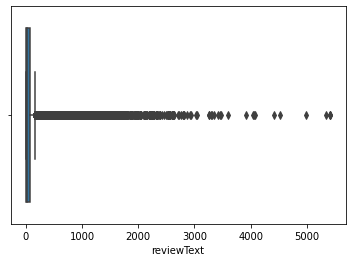

In [63]:
# Boxplot to visualise the length of the review text
sns.boxplot(new_df['reviewText'].map(lambda x: len(x.split())))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148]),
 <a list of 149 Text major ticklabel objects>)

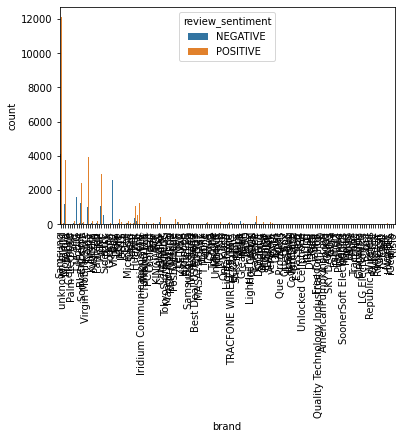

In [60]:
# plot of brand vs review_sentiment
sns.countplot(x = "brand", hue = "review_sentiment", data = new_df)
xticks(rotation = 90)

In [64]:
new_df.isnull().sum()

overall                 0
verified                0
reviewerID              0
asin                    0
style                   0
reviewText              0
summary                 0
unixReviewTime          0
review_sentiment        0
Date&Time               0
description             0
title                   0
also_buy                0
brand                   0
feature                 0
rank                    0
also_view               0
price               34801
dtype: int64

In [65]:
new_df = new_df.drop(["price"], axis = 1)

In [66]:
new_df['review_sentiment'] = new_df['review_sentiment'].map({'POSITIVE':0, 'NEGATIVE':1})
new_df

,overall,verified,reviewerID,asin,style,reviewText,summary,unixReviewTime,review_sentiment,Date&Time,description,title,also_buy,brand,feature,rank,also_view
0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,{'Color:': ' Black'},This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,1,2004-09-20,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,none,Samsung,unknown feature,"[>#3,059,436 in Cell Phones & Accessories (See...",none
1,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,{'Color:': ' Black'},This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,1,2004-09-20,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,none,Samsung,unknown feature,"[>#3,059,436 in Cell Phones & Accessories (See...",none
2,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,{'Color:': ' Black'},I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,0,2004-07-23,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,none,Samsung,unknown feature,"[>#3,059,436 in Cell Phones & Accessories (See...",none
3,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,{'Color:': ' Black'},I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,0,2004-07-23,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,none,Samsung,unknown feature,"[>#3,059,436 in Cell Phones & Accessories (See...",none
4,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,{'Color:': ' Black'},This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,1,2004-07-05,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,none,Samsung,unknown feature,"[>#3,059,436 in Cell Phones & Accessories (See...",none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,1.0,True,A13L832YDDGU9G,B00PDML6U8,{'Color:': ' Black'},The phone was stolen could not activate at all...,Stolen metro PC's phone,1515974400,1,2018-01-14,[The Galaxy LightTM will give you more ways to...,Samsung Galaxy Light SGH-T399N Android 4G-LTE ...,"[B00H50DVPE, B00GXG8SPY]",Samsung,"[Android 4.2.2 system (Jelly Bean), Fast 1.4Gh...","[>#657,463 in Cell Phones & Accessories (See T...","[B00KB5E7KI, B00U6WANTU, B00H50DVPE, B00F9S93S..."
63883,5.0,True,A2UFV43VAUFKSH,B00PDML6U8,{'Color:': ' Black'},good,Five Stars,1471219200,0,2016-08-14,[The Galaxy LightTM will give you more ways to...,Samsung Galaxy Light SGH-T399N Android 4G-LTE ...,"[B00H50DVPE, B00GXG8SPY]",Samsung,"[Android 4.2.2 system (Jelly Bean), Fast 1.4Gh...","[>#657,463 in Cell Phones & Accessories (See T...","[B00KB5E7KI, B00U6WANTU, B00H50DVPE, B00F9S93S..."
63884,1.0,True,A2LQOV3RNG1Y2T,B00PDML6U8,{'Color:': ' Black'},I purchased two of them and had so many proble...,usually they are great products.,1470787200,0,2016-08-09,[The Galaxy LightTM will give you more ways to...,Samsung Galaxy Light SGH-T399N Android 4G-LTE ...,"[B00H50DVPE, B00GXG8SPY]",Samsung,"[Android 4.2.2 system (Jelly Bean), Fast 1.4Gh...","[>#657,463 in Cell Phones & Accessories (See T...","[B00KB5E7KI, B00U6WANTU, B00H50DVPE, B00F9S93S..."
63885,5.0,True,ADY00ZJCY53F1,B00PDML6U8,{'Color:': ' Black'},excelente,Five Stars,1436832000,1,2015-07-13,[The Galaxy LightTM will give you more ways to...,Samsung Galaxy Light SGH-T399N Android 4G-LTE ...,"[B00H50DVPE, B00GXG8SPY]",Samsung,"[Android 4.2.2 system (Jelly Bean), Fast 1.4Gh...","[>#657,463 in Cell Phones & Accessories (See T...","[B00KB5E7KI, B00U6WANTU, B00H50DVPE, B00F9S93S..."


In [67]:
from nltk.stem import SnowballStemmer 
from nltk.tokenize import word_tokenize

In [68]:
#stemming the reviewText column
stemmer = SnowballStemmer('english')
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

new_df["text_stemmed"] = new_df['reviewText'].apply(lambda text: stem_words(text))

In [69]:
# Converting to X
X = new_df.drop(['review_sentiment'], axis=1)
X.head()

,overall,verified,reviewerID,asin,style,reviewText,summary,unixReviewTime,Date&Time,description,title,also_buy,brand,feature,rank,also_view,text_stemmed
0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,{'Color:': ' Black'},This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,2004-09-20,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,none,Samsung,unknown feature,"[>#3,059,436 in Cell Phones & Accessories (See...",none,this phone is ugli and heavi and has a terribl...
1,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,{'Color:': ' Black'},This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,2004-09-20,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,none,Samsung,unknown feature,"[>#3,059,436 in Cell Phones & Accessories (See...",none,this phone is ugli and heavi and has a terribl...
2,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,{'Color:': ' Black'},I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,2004-07-23,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,none,Samsung,unknown feature,"[>#3,059,436 in Cell Phones & Accessories (See...",none,i had the samsung v205 and then i decid to tri...
3,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,{'Color:': ' Black'},I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,2004-07-23,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,none,Samsung,unknown feature,"[>#3,059,436 in Cell Phones & Accessories (See...",none,i had the samsung v205 and then i decid to tri...
4,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,{'Color:': ' Black'},This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,2004-07-05,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,none,Samsung,unknown feature,"[>#3,059,436 in Cell Phones & Accessories (See...",none,this is the first samsung phone i have had and...


In [70]:
# creating y with the target variable
y = new_df['review_sentiment']
y.head()

0    1
1    1
2    0
3    0
4    1
Name: review_sentiment, dtype: int64

In [71]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train_df, X_test_df, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [72]:
y_train.head()

63237    0
559      0
12949    0
60032    0
22929    0
Name: review_sentiment, dtype: int64

In [73]:
# split X and y
X_train = X_train_df['text_stemmed'].values
#y_train = train_array[:,1]
y_train = y_train.astype('int') # sklearn needs y as integers

print("X_train")
print(X_train)
print("y_train")
print(y_train)

X_train
["this is a great replac for my lg volt. i was veri pleas with my lg volt. it was snappy, good memory, i could move app to an sd, the onli problem was a terribl camera. i have been look for an upgrad for a littl while main for a better camera. i was sick of draggin my nikon along with me when i want to take pics. the problem is, all the phone in my price rang were equival if not wors than my volt in all aspects, especi camera. then i saw a deal on this phone and check out the specs. it has 16 gb and while 5 or 6 of them are taken up by preinstal apps, there is still plenti left. the camera is much better than what i had. the selfi camera is even better than the rear face one on my other phone. it is snappi and work well. my onli complaint are with thing i knew befor purchas and thing that seem to be the norm these days. you can't instal app to your sd card. i knew this, but i realli don't understand whi you can't. i guess it just a way to get you to buy a phone with more memori

In [74]:
# create an object of CountVectorizer() class 
from sklearn.feature_extraction.text import CountVectorizer 
# help(CountVectorizer)

In [75]:
vec = CountVectorizer()

In [76]:
# fit the vectorizer on training data 
vec.fit(X_train)
vec.vocabulary_

{'this': 30559,
 'is': 17210,
 'great': 14662,
 'replac': 25705,
 'for': 13369,
 'my': 20633,
 'lg': 18349,
 'volt': 32968,
 'was': 33223,
 'veri': 32700,
 'pleas': 23432,
 'with': 33754,
 'it': 17262,
 'snappy': 28185,
 'good': 14420,
 'memory': 19596,
 'could': 8804,
 'move': 20393,
 'app': 3965,
 'to': 30828,
 'an': 3684,
 'sd': 26974,
 'the': 30422,
 'onli': 21827,
 'problem': 24096,
 'terribl': 30316,
 'camera': 6888,
 'have': 15195,
 'been': 5561,
 'look': 18770,
 'upgrad': 32307,
 'littl': 18613,
 'while': 33509,
 'main': 19103,
 'better': 5717,
 'sick': 27611,
 'of': 21622,
 'draggin': 10808,
 'nikon': 21141,
 'along': 3508,
 'me': 19450,
 'when': 33483,
 'want': 33170,
 'take': 29946,
 'pics': 23206,
 'all': 3453,
 'phone': 23082,
 'in': 16367,
 'price': 24000,
 'rang': 24926,
 'were': 33426,
 'equival': 11820,
 'if': 16126,
 'not': 21297,
 'wors': 33926,
 'than': 30398,
 'aspects': 4285,
 'especi': 11901,
 'then': 30452,
 'saw': 26751,
 'deal': 9544,
 'on': 21780,
 'and': 370

In [77]:
vec.get_feature_names()

['00',
 '000',
 '0000',
 '000000',
 '00001',
 '0002',
 '000kbps',
 '000ma',
 '000mah',
 '001',
 '002',
 '003395',
 '004',
 '005',
 '007',
 '008g',
 '00am',
 '00p',
 '00pm',
 '00r_mpap',
 '00x2',
 '01',
 '0100',
 '011',
 '012',
 '014',
 '0155379',
 '016g',
 '017',
 '01cents',
 '01fhslqo9ss',
 '01gb',
 '01uel',
 '02',
 '020',
 '0204',
 '022',
 '024x1',
 '0251',
 '02mb',
 '02mm',
 '03',
 '032g',
 '033',
 '0385344554',
 '04',
 '0400',
 '043',
 '0430',
 '046',
 '04p8gfgn8k0bmxz9mn2f',
 '05',
 '050',
 '0500',
 '05oct11',
 '06',
 '0630',
 '064g',
 '069',
 '07',
 '07932',
 '07mpixel',
 '08',
 '080',
 '083mb',
 '08mbps',
 '09',
 '0a',
 '0c',
 '0ce',
 '0gb',
 '0ghz',
 '0hd',
 '0ii',
 '0in',
 '0lte',
 '0marshmallow',
 '0mp',
 '0no',
 '0s',
 '0x',
 '0x0',
 '0x1',
 '0xx',
 '10',
 '100',
 '1000',
 '10000',
 '10000mah',
 '1000ma',
 '1000s',
 '1000x',
 '1001',
 '1003',
 '10050',
 '10073',
 '100g',
 '100gb',
 '100k',
 '100kbps',
 '100mah',
 '100mb',
 '100million',
 '100min',
 '100s',
 '100x',
 '101',
 

In [78]:
# Importing the stop words 
stopwords = [line.rstrip('\n') for line in open('/content/gdrive/MyDrive/web & social media/stop_words_long.txt')]

In [79]:
# fitting the vectorizer on training data again
# removing the stop words this time
vec = CountVectorizer(stop_words='english', max_features=10000)
vec.fit(X_train)
vec.vocabulary_

{'great': 4122,
 'replac': 7389,
 'lg': 5213,
 'volt': 9586,
 'veri': 9502,
 'pleas': 6694,
 'snappy': 8189,
 'good': 4049,
 'memory': 5616,
 'app': 951,
 'sd': 7786,
 'onli': 6232,
 'problem': 6912,
 'terribl': 8831,
 'camera': 1680,
 'look': 5346,
 'upgrad': 9373,
 'littl': 5296,
 'main': 5448,
 'better': 1327,
 'sick': 7995,
 'nikon': 6047,
 'want': 9639,
 'pics': 6625,
 'phone': 6597,
 'price': 6876,
 'rang': 7140,
 'equival': 3240,
 'wors': 9860,
 'aspects': 1047,
 'especi': 3264,
 'saw': 7727,
 'deal': 2514,
 'check': 1859,
 'specs': 8305,
 '16': 93,
 'gb': 3931,
 'taken': 8730,
 'preinstal': 6836,
 'apps': 988,
 'plenti': 6700,
 'left': 5179,
 'selfi': 7832,
 'rear': 7199,
 'face': 3461,
 'snappi': 8187,
 'work': 9836,
 'complaint': 2106,
 'thing': 8886,
 'knew': 5054,
 'befor': 1283,
 'purchas': 7037,
 'norm': 6078,
 'days': 2502,
 'instal': 4756,
 'card': 1712,
 'realli': 7195,
 'don': 2891,
 'understand': 9257,
 'whi': 9735,
 'guess': 4178,
 'just': 4994,
 'way': 9680,
 'buy'

In [80]:
print(len(vec.get_feature_names()))

10000


In [81]:
# another way of representing the features
X_transformed = vec.transform(X_train)
X_transformed

<51109x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 1419070 stored elements in Compressed Sparse Row format>

In [82]:
# converting transformed matrix back to an array
X_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Model evaluation on Train data

In [83]:

# split into X and y
X_train_evl = X_train_df['text_stemmed'].values
y_train_evl = y_train.astype('int').values # sklearn needs y as integers

print("X_train")
print(X_train_evl)
print("y_test")
print(y_train_evl)

X_train
["this is a great replac for my lg volt. i was veri pleas with my lg volt. it was snappy, good memory, i could move app to an sd, the onli problem was a terribl camera. i have been look for an upgrad for a littl while main for a better camera. i was sick of draggin my nikon along with me when i want to take pics. the problem is, all the phone in my price rang were equival if not wors than my volt in all aspects, especi camera. then i saw a deal on this phone and check out the specs. it has 16 gb and while 5 or 6 of them are taken up by preinstal apps, there is still plenti left. the camera is much better than what i had. the selfi camera is even better than the rear face one on my other phone. it is snappi and work well. my onli complaint are with thing i knew befor purchas and thing that seem to be the norm these days. you can't instal app to your sd card. i knew this, but i realli don't understand whi you can't. i guess it just a way to get you to buy a phone with more memori

In [84]:
# building a multinomial NB model
from sklearn.naive_bayes import MultinomialNB

# instantiate NB class
mnb=MultinomialNB()

# fitting the model on training data
mnb.fit(X_transformed, y_train_evl)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [85]:
# predicting sentiments of test data
pred_sentiment_evl = mnb.predict(X_transformed)
pred_sentiment_evl

array([0, 0, 0, ..., 1, 1, 0])

In [86]:
# creating a new column predicted-sentiment in the dataframe
X_train_df['predicted_sentiment'] = pred_sentiment_evl

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
# mapping the 0s and 1s with postive and negative labels respectively
X_train_df['predicted_sentiment'] = X_train_df['predicted_sentiment'].map({0:'POSITIVE', 1:'NEGATIVE'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [89]:
confusion_matrix(y_train_evl,pred_sentiment_evl)

array([[35080,  3082],
       [ 4815,  8132]])

In [90]:
accuracy_score(y_train_evl,pred_sentiment_evl)

0.8454870962061476

The model has predicted the sentiment with an accuracy of 84.5% using the train data



# Model evaluation on Test data

In [91]:
# convert to numpy array

# split into X and y
X_test = X_test_df['text_stemmed'].values
y_test = y_test.astype('int').values # sklearn needs y as integers

print("X_test")
print(X_test)
print("y_test")
print(y_test)

X_test
['rememb when nokia made all the great phone befor the "smart phone took over"! well this phone is great. i had sever other major brand boost phone up to doubl the price of this phone and alway complain that the signal was bad. i don\'t know what the differ is but nokia seem to be pull signal out of the air when my more expens boost phone could not. yes this is a window phone, yes everyth is differ and onc you get past that (you can i am 64) you will enjoy everyth about this phone. it is fast, it take great photos, make clear call and while i don\'t do a lot of game (ye i am 64) the one i do seem to work well. movi are clear and crisp ... so if you think i like this phone you would be correct. boost is the onli provid close to my hunt camp so i have to use one phone with them... and i love this phone so well i will get a window 10 microsoft phone when window 10 has been out for a year. if you don\'t like it, amazon prime return is alway an option.'
 'nice littl smaller than expe

In [92]:
# transforming the test data
X_test_transformed = vec.transform(X_test)
X_test_transformed

<12778x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 350152 stored elements in Compressed Sparse Row format>

In [93]:
# convert to non-sparse array
X_test=X_test_transformed.toarray()
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Building the Model: Multinomial Naive Bayes

In [94]:
# building a multinomial NB model
from sklearn.naive_bayes import MultinomialNB

# instantiate NB class
mnb=MultinomialNB()

# fitting the model on training data
mnb.fit(X_transformed, y_train)



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [95]:
# predicting sentiments of test data
pred_sentiment = mnb.predict(X_test_transformed)

In [96]:
pred_sentiment

array([0, 0, 0, ..., 1, 0, 0])

In [97]:
# creating a new column predicted-sentiment in the dataframe
X_test_df['predicted_sentiment'] = pred_sentiment

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
# mapping the 0s and 1s with postive and negative labels respectively
X_test_df['predicted_sentiment'] = X_test_df['predicted_sentiment'].map({0:'POSITIVE', 1:'NEGATIVE'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [99]:
X_test_df.head()

,overall,verified,reviewerID,asin,style,reviewText,summary,unixReviewTime,Date&Time,description,title,also_buy,brand,feature,rank,also_view,text_stemmed,predicted_sentiment
48875,5.0,True,A1DZJ4LTAZZ8VC,B00S8GNTJM,{'Style:': ' Boost Mobile'},Remember when Nokia made all the great phones ...,Nokia phone gives Boost better reception and c...,1448668800,2015-11-27,[Nokia Lumia 635 Windows Smart Phone],Nokia Lumia 635 (Windows) Blue (Boost Mobile),"[B00K0OKMWM, B00S469VAC, B01GM1TH54, B00PNGHCY...",Nokia,"[Touchbar, Windows 8.1 Operating System, Lumia...","[>#259,832 in Cell Phones & Accessories (See T...","[B06Y6J869C, B01LZMYU7U, B0052OHE7G, B00YMSW5G...",rememb when nokia made all the great phone bef...,POSITIVE
22027,4.0,True,A30M5GDFVUY0TT,B00D99ZBR6,{'Color:': ' Black'},"Nice little smaller than expected, other than ...",Samsung galaxy Prevail,1382486400,2013-10-22,"[Android 4.1 (Jelly Bean) 1.4 GHz Processor 4""...",Samsung Galaxy Prevail II (Boost Mobile) (Disc...,none,Samsung,[Android 4.1 & Get Android Apps on Google Play...,"[>#220,159 in Cell Phones & Accessories (See T...","[B01NBVONAO, B06Y6J869C, B0797GJZX7, B00SHZJ6B...","nice littl smaller than expected, other than t...",POSITIVE
28045,4.0,True,A2BFUEJPGHLPWX,B00FJBAOCY,{'Color:': ' Black'},Same thing the memory,Four Stars,1407628800,2014-08-09,[Body Dimensions: 116.5 x 62 x 12 mm (4.59 x 2...,BLU Dash JR D140 Unlocked Dual Sim Phone (Silver),none,BLU,[Unlocked Dual SIM 3.5-Inch High Resolution HV...,"[>#415,146 in Cell Phones & Accessories (See T...",none,same thing the memori,POSITIVE
28334,4.0,True,A249DQOXOM55LZ,B00FX8WIUE,{'Color:': ' Blue'},Very good,Four Stars,1459123200,2016-03-27,[Blu Dash 5.5 Dual Sim Unlocked GSM Phone - Pi...,BLU Studio 5.5 D610a Unlocked Dual SIM GSM Pho...,none,BLU,"[Unlocked Dual Sim 5.0-Inch FWVGA Display, 1.2...","[>#318,077 in Cell Phones & Accessories (See T...","[B01MU0YKUB, B077QVG8S8, B00MWI4HW0, B07F43F8G...",veri good,POSITIVE
28218,1.0,True,A2C3XASBZE18CS,B00FUXLT9S,{'Color:': ' Black'},Defectuoso,One Star,1405036800,2014-07-10,[<br>This phone Compatible with :\n<br>AT&T ( ...,Generic Unlocked Quadband 2 sim with Android 2...,none,Generic,[UNLOCKED 2G Android 4.1 Mobile Smart Global P...,"[>#228,353 in Electronics (See Top 100 in Elec...",none,defectuoso,NEGATIVE


In [100]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [101]:
confusion_matrix(y_test,pred_sentiment)

array([[8754,  802],
       [1279, 1943]])

In [102]:
accuracy_score(y_test,pred_sentiment)

0.837141962748474

##### Accuracy of 83.7% is achieved on runnning the model with test data which is pretty close to the accuracy achieved from the train data.
